In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from corner import corner

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
import mejiro
# config_file = os.path.join(os.path.dirname(mejiro.__file__), 'data', 'mejiro_config', 'roman_data_challenge_mini.yaml')
config_file = '/grad/bwedig/mejiro/mejiro/data/mejiro_config/jwst.yaml'
with open(config_file, 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '05')

# pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'Exposure_*.pkl')))
pickles = sorted(glob(os.path.join(data_dir, 'Exposure_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 147873 pickle(s) in /data/bwedig/mejiro/jwst_dev/05


/grad/bwedig/mejiro/mejiro/exposure.py:149: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(self.exposure), origin='lower')
/grad/bwedig/mejiro/mejiro/analysis/snr_calculation.py:91: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(exposure.source_exposure / np.sqrt(exposure.exposure), nan=0, posinf=0, neginf=0)
/grad/bwedig/mejiro/mejiro/analysis/snr_calculation.py:91: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(exposure.source_exposure / np.sqrt(exposure.exposure), nan=0, posinf=0, neginf=0)


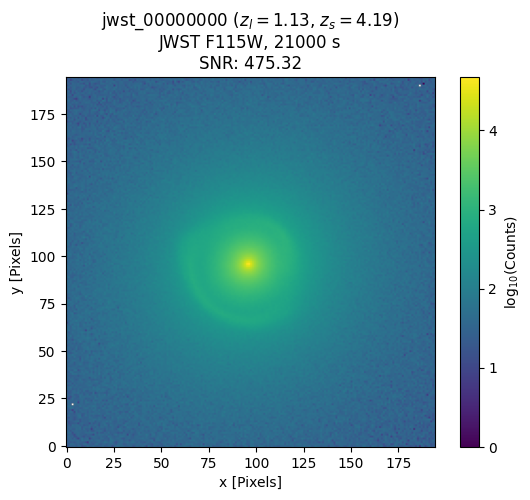

In [3]:
sample = util.unpickle(pickles[0])
sample.plot(show_snr=True)

In [4]:
from mejiro.analysis.snr_calculation import get_snr

snr, masked_snr_array = get_snr(sample, verbose=True)

Using structure
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Identified 92 region(s)
Region 1: SNR = 1.127901273521719
Region 2: SNR = 1.1594806510982145
Region 3: SNR = 1.2262518148954362
Region 4: SNR = 1.0164374056000927
Region 5: SNR = 1.1550605876161517
Region 6: SNR = 1.1180194702657031
Region 7: SNR = 1.6888488256174436
Region 8: SNR = 1.0547355845840116
Region 9: SNR = 1.2105657196381348
Region 10: SNR = 1.1238087063311182
Region 11: SNR = 1.031531695209207
Region 12: SNR = 1.638003642061443
Region 13: SNR = 1.1765535998136163
Region 14: SNR = 475.32372064199603
Region 15: SNR = 1.3680465119473408
Region 16: SNR = 1.0694884132072577
Region 17: SNR = 1.7944756972531175
Region 18: SNR = 2.01348784393761
Region 19: SNR = 1.610157968282182
Region 20: SNR = 1.1845954620854064
Region 21: SNR = 1.1814902365806683
Region 22: SNR = 1.1615002926683844
Region 23: SNR = 1.2062976418815268
Region 24: SNR = 1.6589604757017664
Region 25: SNR = 1.1974309202928985
Region 26: SNR = 1.182744261070719
Region 27: S

/tmp/ipykernel_3017351/200838341.py:4: RuntimeWarning: divide by zero encountered in log10
  im0 = ax[0].imshow(np.log10(sample.exposure))


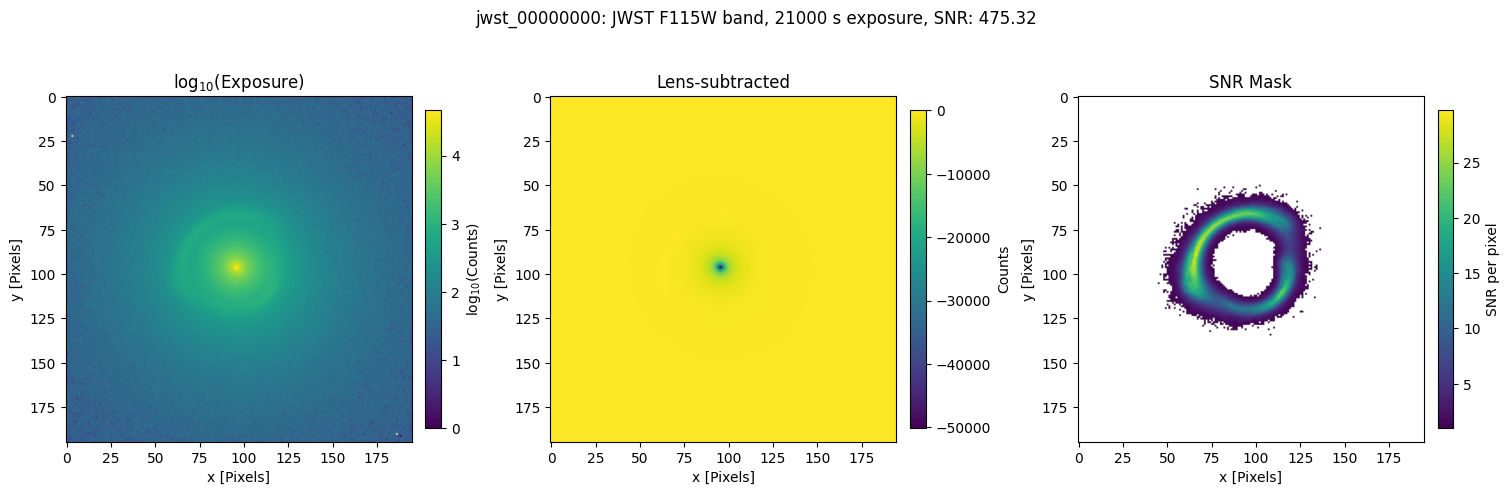

In [5]:
show_snr = True

_, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
im0 = ax[0].imshow(np.log10(sample.exposure))
im1 = ax[1].imshow(sample.exposure - sample.lens_exposure)
im2 = ax[2].imshow(masked_snr_array)

cbar0 = plt.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
cbar0.set_label(r'log$_{10}$(Counts)')

cbar1 = plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
cbar1.set_label(r'Counts')

cbar2 = plt.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
cbar2.set_label(r'SNR per pixel')

ax[0].set_title(r'log$_{10}$(Exposure)')
ax[1].set_title('Lens-subtracted')
ax[2].set_title('SNR Mask')

for a in ax:
    a.set_xlabel('x [Pixels]')
    a.set_ylabel('y [Pixels]')

title = f'{sample.synthetic_image.strong_lens.name}: {sample.synthetic_image.instrument_name} {sample.synthetic_image.band} band, {sample.exposure_time} s exposure'
if show_snr:
    snr = sample.get_snr()
    title += f', SNR: {snr:.2f}'
plt.suptitle(title)

plt.show()

Note: if you decide to save the following figure, make sure to save it with a high DPI otherwise you can get weird boxes around bright sources which must be some kind of compression artifact.

/tmp/ipykernel_3017351/2511396296.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.flat[i].imshow(np.log10(sample.exposure))


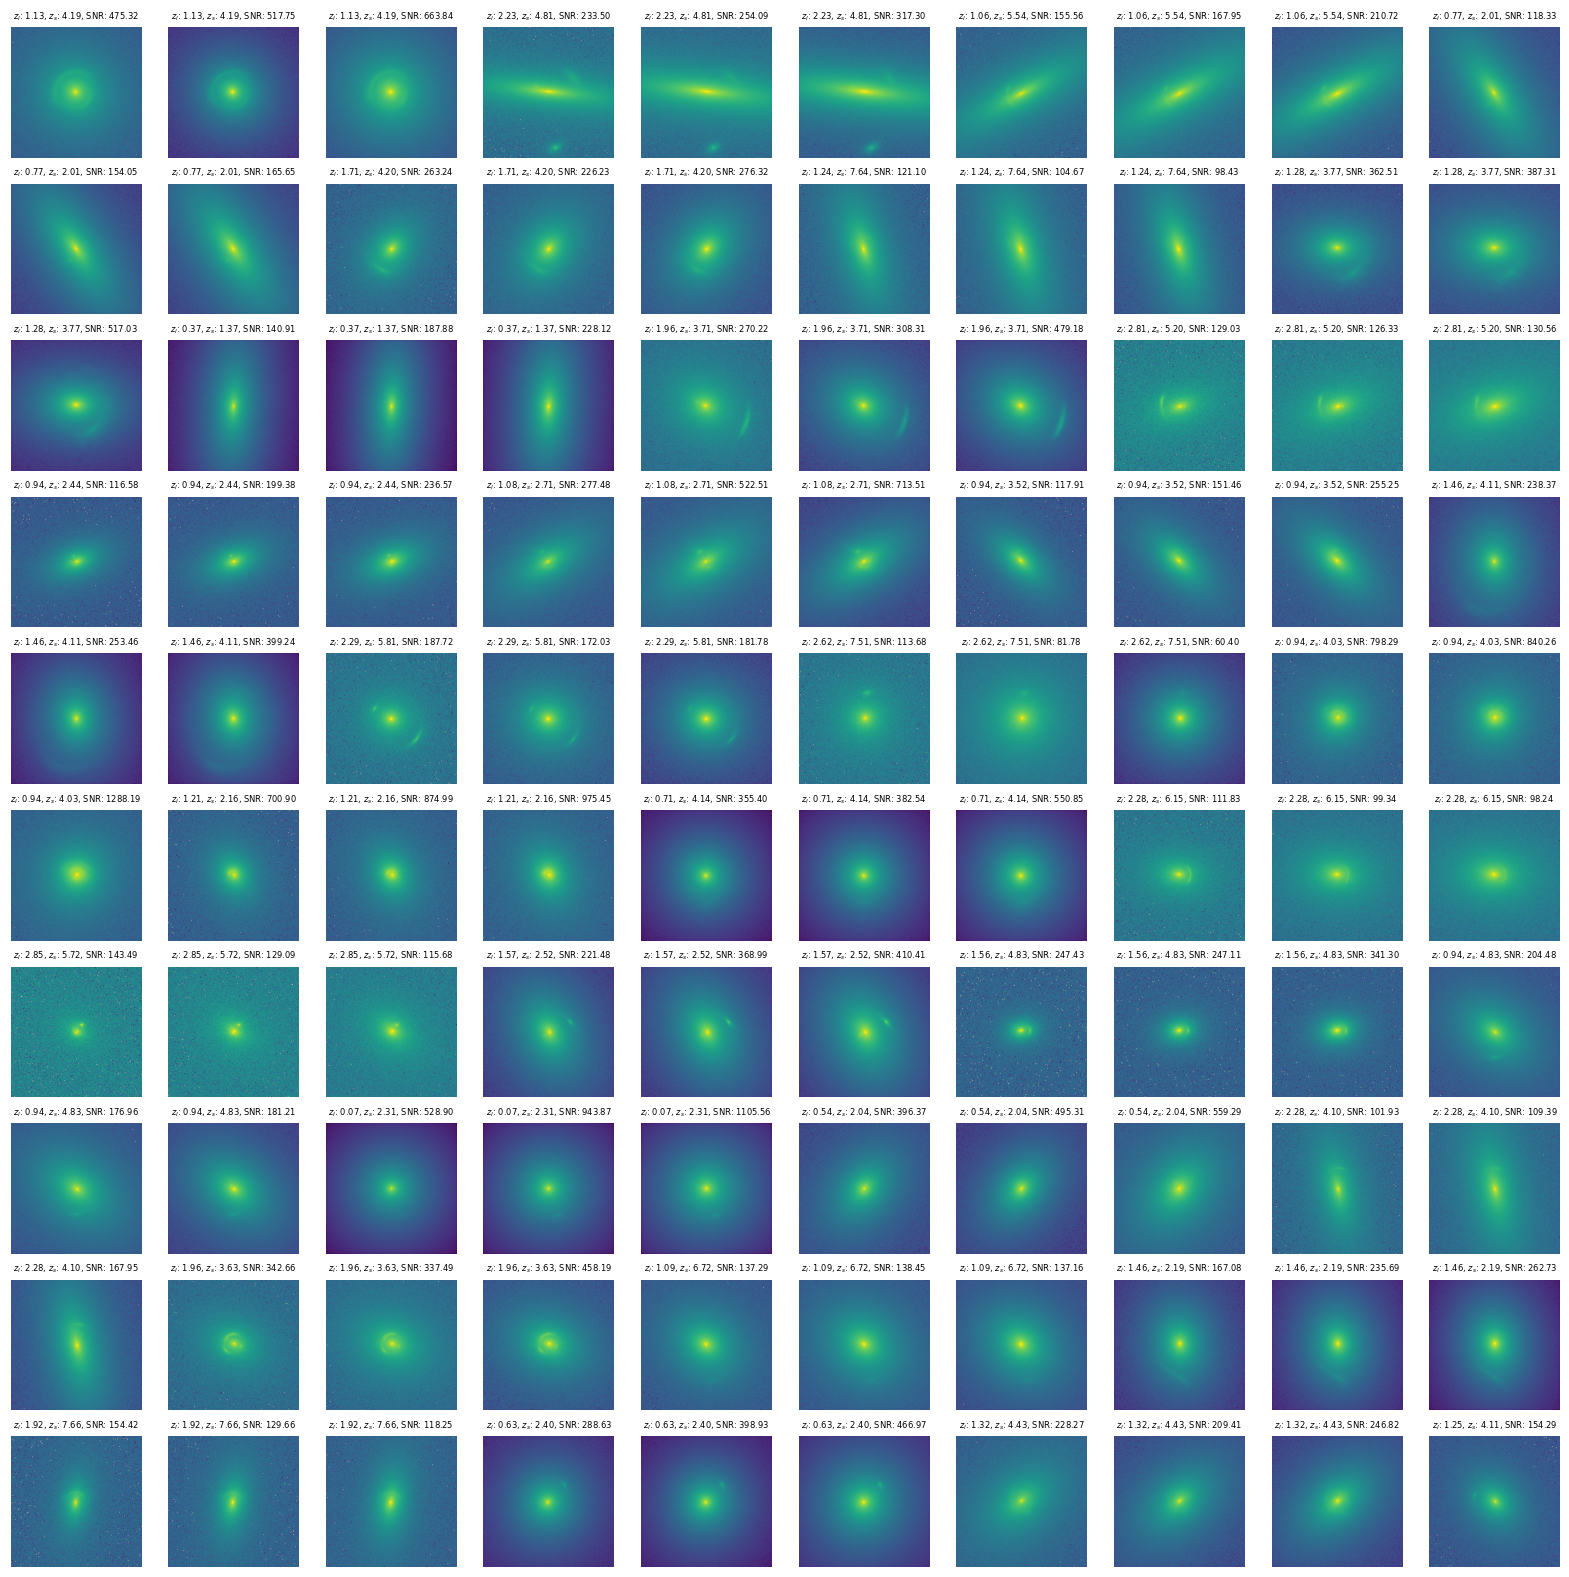

In [6]:
_, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    sample = util.unpickle(pickles[i])
    snr = sample.get_snr()

    ax.flat[i].imshow(np.log10(sample.exposure))
    ax.flat[i].axis('off')
    ax.flat[i].set_title(f'$z_l$: {sample.synthetic_image.strong_lens.z_lens:.2f}, $z_s$: {sample.synthetic_image.strong_lens.z_source:.2f}, SNR: {snr:.2f}', fontsize=6)

# plt.savefig('exposures_grid.png', dpi=600)
plt.show()

Found 49291 exposures with all target bands: ['F200W', 'F150W', 'F115W']


/grad/bwedig/mejiro/mejiro/analysis/snr_calculation.py:91: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(exposure.source_exposure / np.sqrt(exposure.exposure), nan=0, posinf=0, neginf=0)
/grad/bwedig/mejiro/mejiro/analysis/snr_calculation.py:91: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(exposure.source_exposure / np.sqrt(exposure.exposure), nan=0, posinf=0, neginf=0)


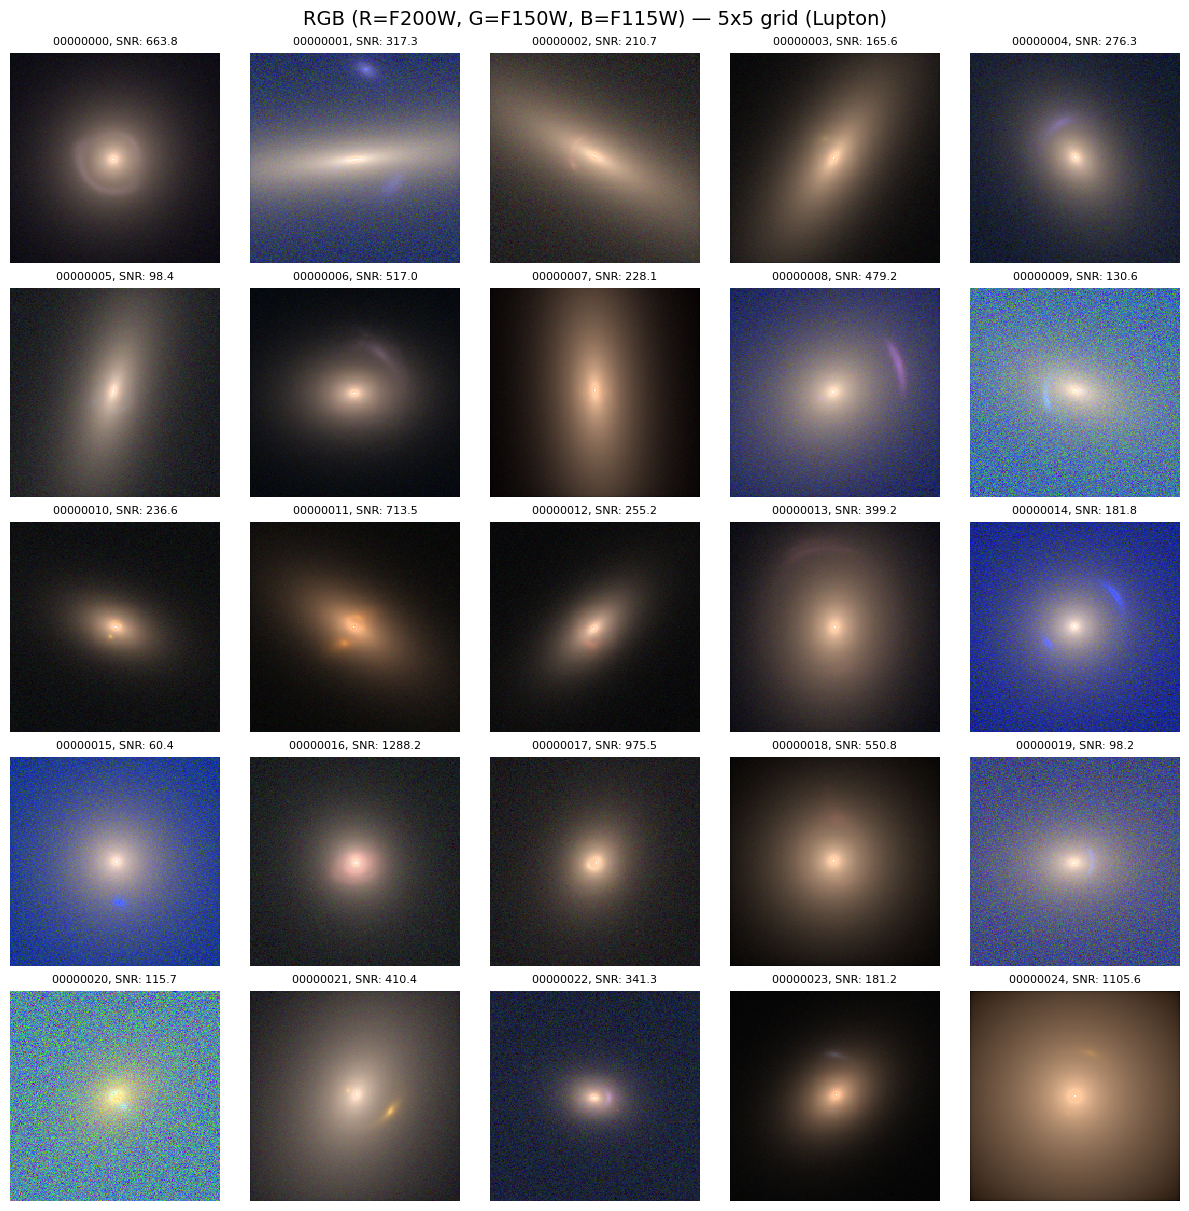

In [41]:
from astropy.visualization import make_lupton_rgb

from collections import defaultdict

# target bands mapped to RGB channels (R, G, B)
target_bands = ['F200W', 'F150W', 'F115W']

# group pickle files by exposure id
by_id = defaultdict(dict)
for p in pickles:
    bn = os.path.basename(p)
    parts = bn.replace('.pkl', '').split('_')
    if len(parts) < 4:
        continue
    exp_id = parts[2]
    band = parts[3]
    by_id[exp_id][band] = p

# collect ids that have all target bands
good_ids = [eid for eid, bands in by_id.items() if all(b in bands for b in target_bands)]
print(f'Found {len(good_ids)} exposures with all target bands: {target_bands}')

# limit to 25 images for 5x5 grid
n = 25
good_ids = good_ids[:n]

fig, axes = plt.subplots(5, 5, figsize=(12, 12), constrained_layout=True)

for ax_idx, eid in enumerate(good_ids):
    row = ax_idx // 5
    col = ax_idx % 5
    axc = axes[row, col]

    try:
        # load exposures for each band in R,G,B order
        samples = [util.unpickle(by_id[eid][b]) for b in target_bands]
        channels = [np.array(s.exposure, dtype=float) for s in samples]

        clean = []
        for ch in channels:
            ch = np.array(ch, dtype=float)
            rng = ch.max() - ch.min()
            if rng > 0:
                clean.append(255 * (ch - ch.min()) / rng)
            else:
                clean.append(np.zeros_like(ch, dtype=float))

        rgb = make_lupton_rgb(image_r=clean[0], image_g=clean[1], image_b=clean[2], minimum=np.min(clean), stretch=2, Q=8)

        # normalize final rgb to uint8 [0,255]
        if np.issubdtype(rgb.dtype, np.floating):
            rgb = (np.clip(rgb, 0.0, 1.0) * 255).astype(np.uint8)
        else:
            rgb = np.clip(rgb, 0, 255).astype(np.uint8)

        axc.imshow(rgb, origin='lower', interpolation='nearest')
        axc.axis('off')

        # title with id and SNR from one of the samples
        snr_val = samples[0].get_snr()
        axc.set_title(f'{eid}, SNR: {snr_val:.1f}', fontsize=8)
    except Exception as e:
        axc.text(0.5, 0.5, 'error', ha='center', va='center')
        axc.axis('off')

# turn off any unused axes if fewer than 25
for i in range(len(good_ids), 25):
    axes.flat[i].axis('off')

plt.suptitle('RGB (R=F200W, G=F150W, B=F115W) — 5x5 grid (Lupton)', fontsize=14)
plt.show()